# Mini-Project  -  3

## Application of Deep Neural Networks in Diabetes Biomarkers prediction Development

## Abstract : 

Machine learning and Deep Learning are popular technologies which are innovating the world, predicting outcomes and plays an important role in making good decisions. In a sector like healthcare, it is interesting to note how deep learning and machine learning can be beneficial in diagnosis and treatment of diseases like Diabetes.Diabetes is one of the most popular disease affecting the patients due to lack of insulin content in the body.Biomarkers are basically the indicators which helps in diagnosis of a health condition or disease. This plays an important role in diagnostic department of healthcare sector. Through this project, we are trying to implement deep learning technique in healthcare. 

This project aims using different machine learning and deep learning techniques to identify different diabetes biomarkers present in the blood sample of various patients. Developing a neural network model to predict whether person will have diabetes. 

## Purpose :

Purpose of the project is to use different machine learning techniques and also deep learning techniques to predict the output and compare the performance of deep neural networks over traditional machine learning models.

## Acknowledgements:
The Dataset is aquired from Kaggle competition which is located at https://www.kaggle.com/uciml/pima-indians-diabetes-database. The entire data is belong to National Institute of Diabetes and Digestive and Kidney Diseases 

## About the data set
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Techniques Used: 
We will be using different machine learning as well as spot check alogorithm to understand and predict the given outcome.

### Machine Learning techniques Used:
H20 

### Evaluation Metrics Used:

We will be employing Accuracy, AUC-ROC curve, binary cross entropy. We will be plotting the graphs to check training and validation accuracy as well as training and validation loss.

## About Dataset

Dataset has been taken from Kaggle. 
This dataset comprises of blood sample of different patients used to depict whether person will have diabetes or not.

Sample Size : 768

No of features: 9

Type of problem: Binary classification. 

### Exploring the dataset 

We will be reading the dataset and importing into a dataframe and understand different statistical aspects of the dataset. We will check if null values are present in the dataset.

In [1]:
#importing sklearn and traditional Python machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
## For scaling data 
from mlxtend.preprocessing import minmax_scaling 
# Tensorflow 
import tensorflow as tf
# importing keras, tensorflow and related modules
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers
from keras.optimizers import Adam, SGD, RMSprop
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# importing the dataset and initializing a dataframe.
diabetes_df=pd.read_csv("https://raw.githubusercontent.com/Poojithamuppalla/pimadeeplearningPrediction/main/diabetes.csv", decimal = ',')



### Exploratory Data Analysis and Data Cleaning

Here, we will be exploring the data and check for null values, improper formats and other data related issues. We will resolve these issues and clean the data which can be furthur used for building the model. 

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:

display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    int64 
 2   BloodPressure             768 non-null    int64 
 3   SkinThickness             768 non-null    int64 
 4   Insulin                   768 non-null    int64 
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    int64 
 8   Outcome                   768 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 54.1+ KB


None

### Data Pre-processing and Exploratory Data Analysis

Before any model building, it is essential to understand the data properly, understand the importance of various features of the dataset. It is essential to clean the dataset and prepare it for model building so that predicting outcome is easier and more efficient. 

One part of data pre-processing is checking for the missing values in the dataset. Below line of code executed shows number of missing values in the dataset. 

In [6]:
# checking whether there are any missing values in the dataset.
diabetes_df.isnull().values.any()

False

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


### Skewness

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, But i am not going to alter them so that i can see actual statistics of Data. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

In [8]:

diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN) 

In [9]:
## Checking the new null values found.
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
diabetes_df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

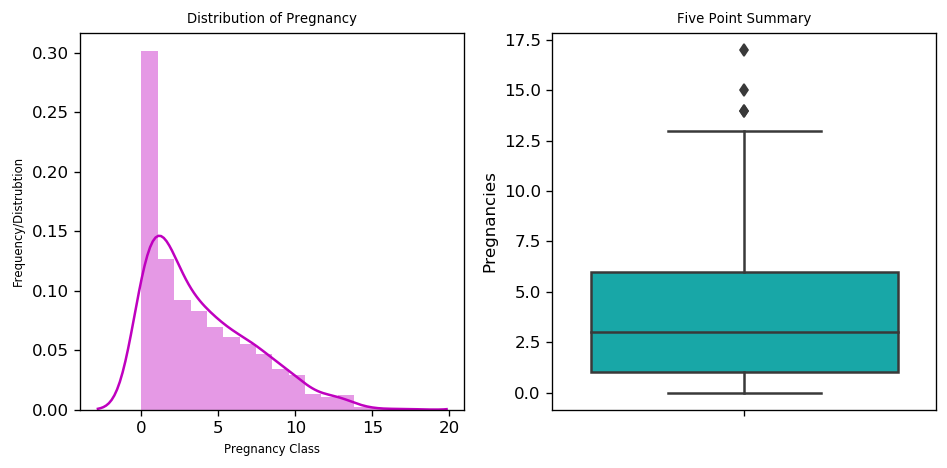

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diabetes_df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=diabetes_df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well, we are done with Pregnancy variable. Let us see next one.

In [12]:
diabetes_df['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

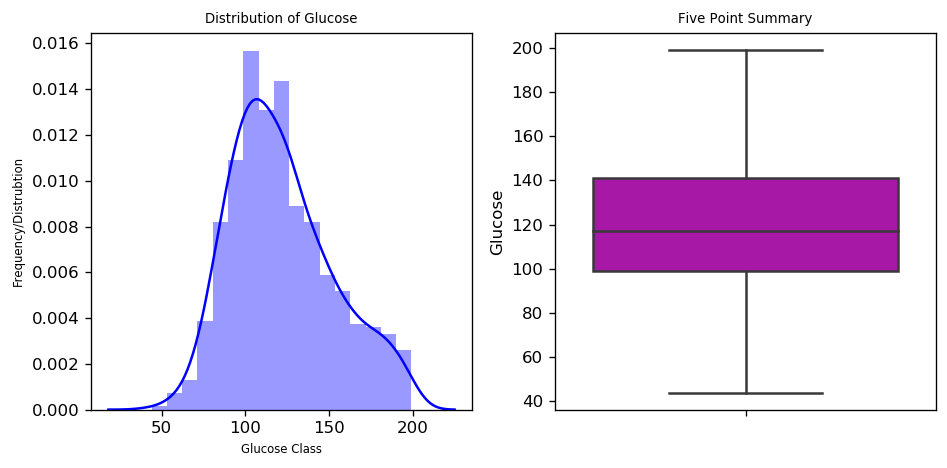

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diabetes_df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=diabetes_df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Glucose = 0, does not make any sense.

In [14]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((dataset.isnull().sum())/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

In [15]:
missing_plot(diabetes_df,'Outcome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb79090b10>,
      dtype=object)

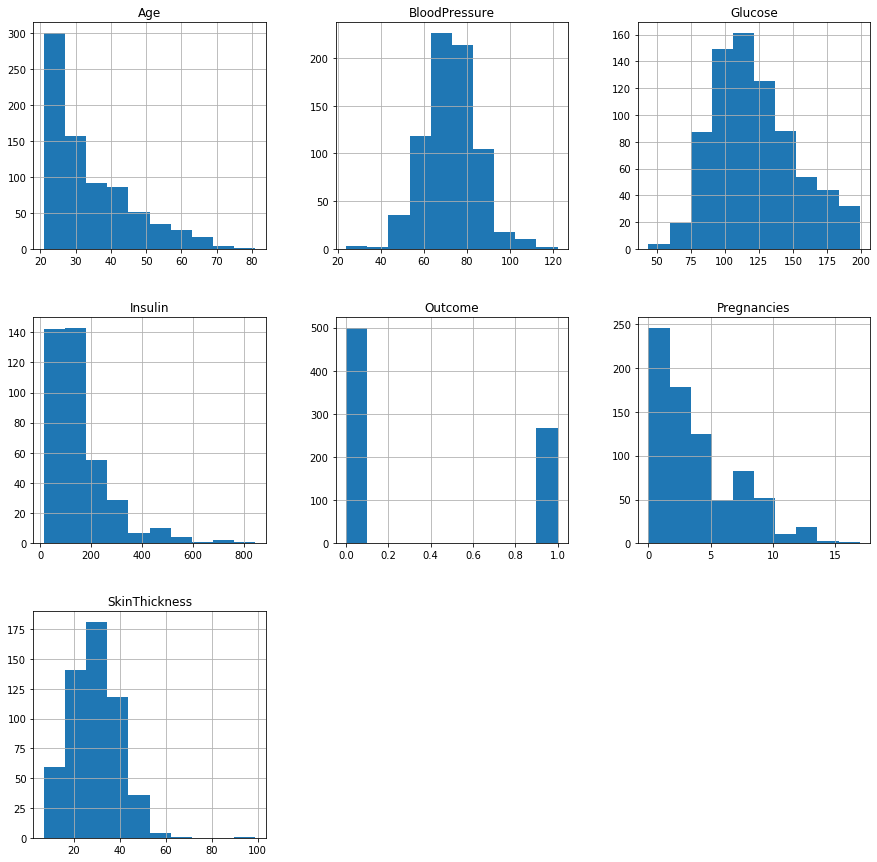

In [16]:
diabetes_df.hist(figsize=(15,15))

Now,Lets fill the null values with the median.

In [17]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].median(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

In [18]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00,3.000000,6.00,17.0
Glucose,768.0,121.656250,30.438286,44.0,99.75,117.000000,140.25,199.0
BloodPressure,768.0,72.405184,12.096346,24.0,64.00,72.202592,80.00,122.0
SkinThickness,768.0,29.153420,8.790942,7.0,25.00,29.153420,32.00,99.0
Insulin,768.0,140.671875,86.383060,14.0,121.50,125.000000,127.25,846.0
Age,768.0,33.240885,11.760232,21.0,24.00,29.000000,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.000000,1.00,1.0


In [19]:

display(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now all the null values are replaced .We can procced with feature Engineering

0    500
1    268
Name: Outcome, dtype: int64


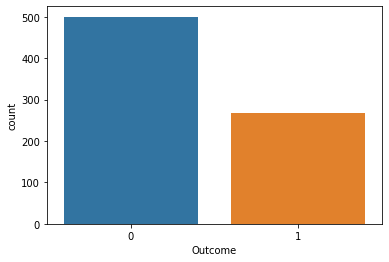

In [20]:
print(diabetes_df['Outcome'].value_counts())
sns.countplot(diabetes_df['Outcome'])

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

### Scatter matrix of uncleaned data

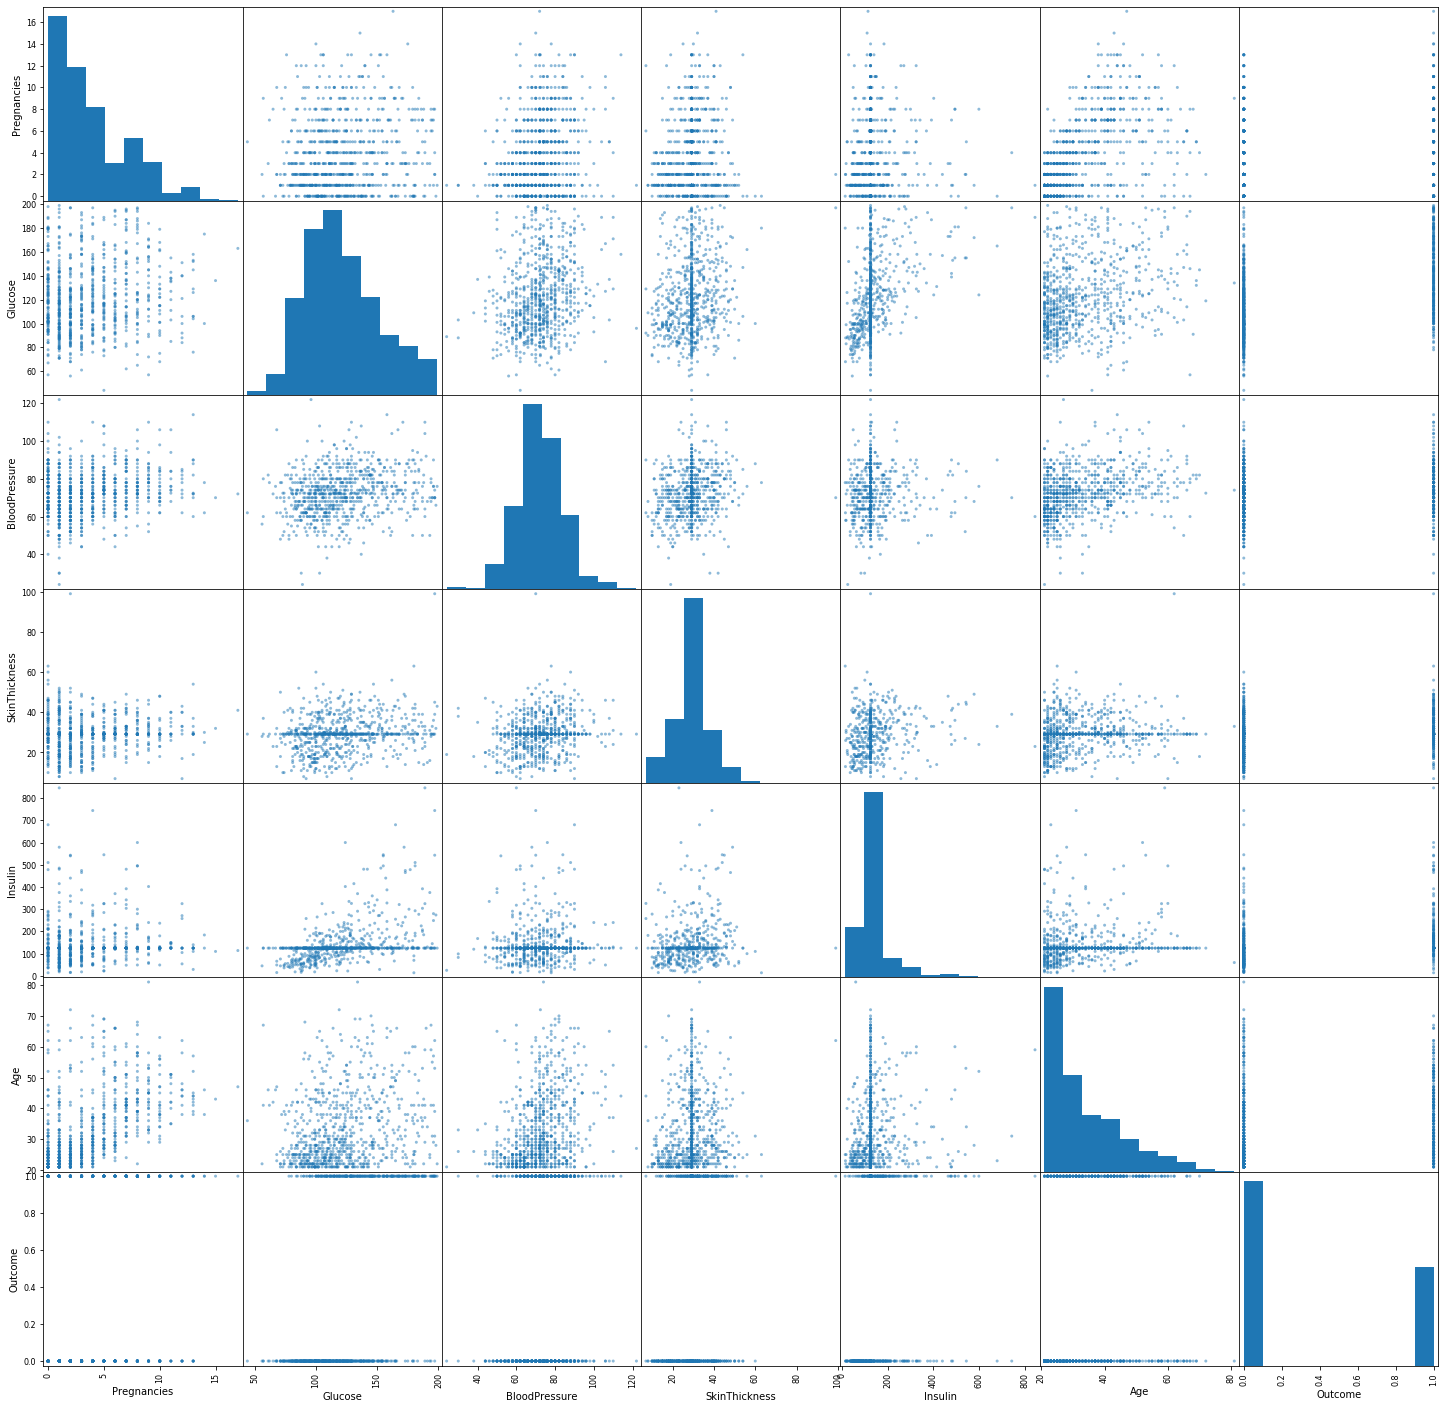

In [21]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_df,figsize=(25, 25))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.¶
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166



### Pair Plot for Clean data

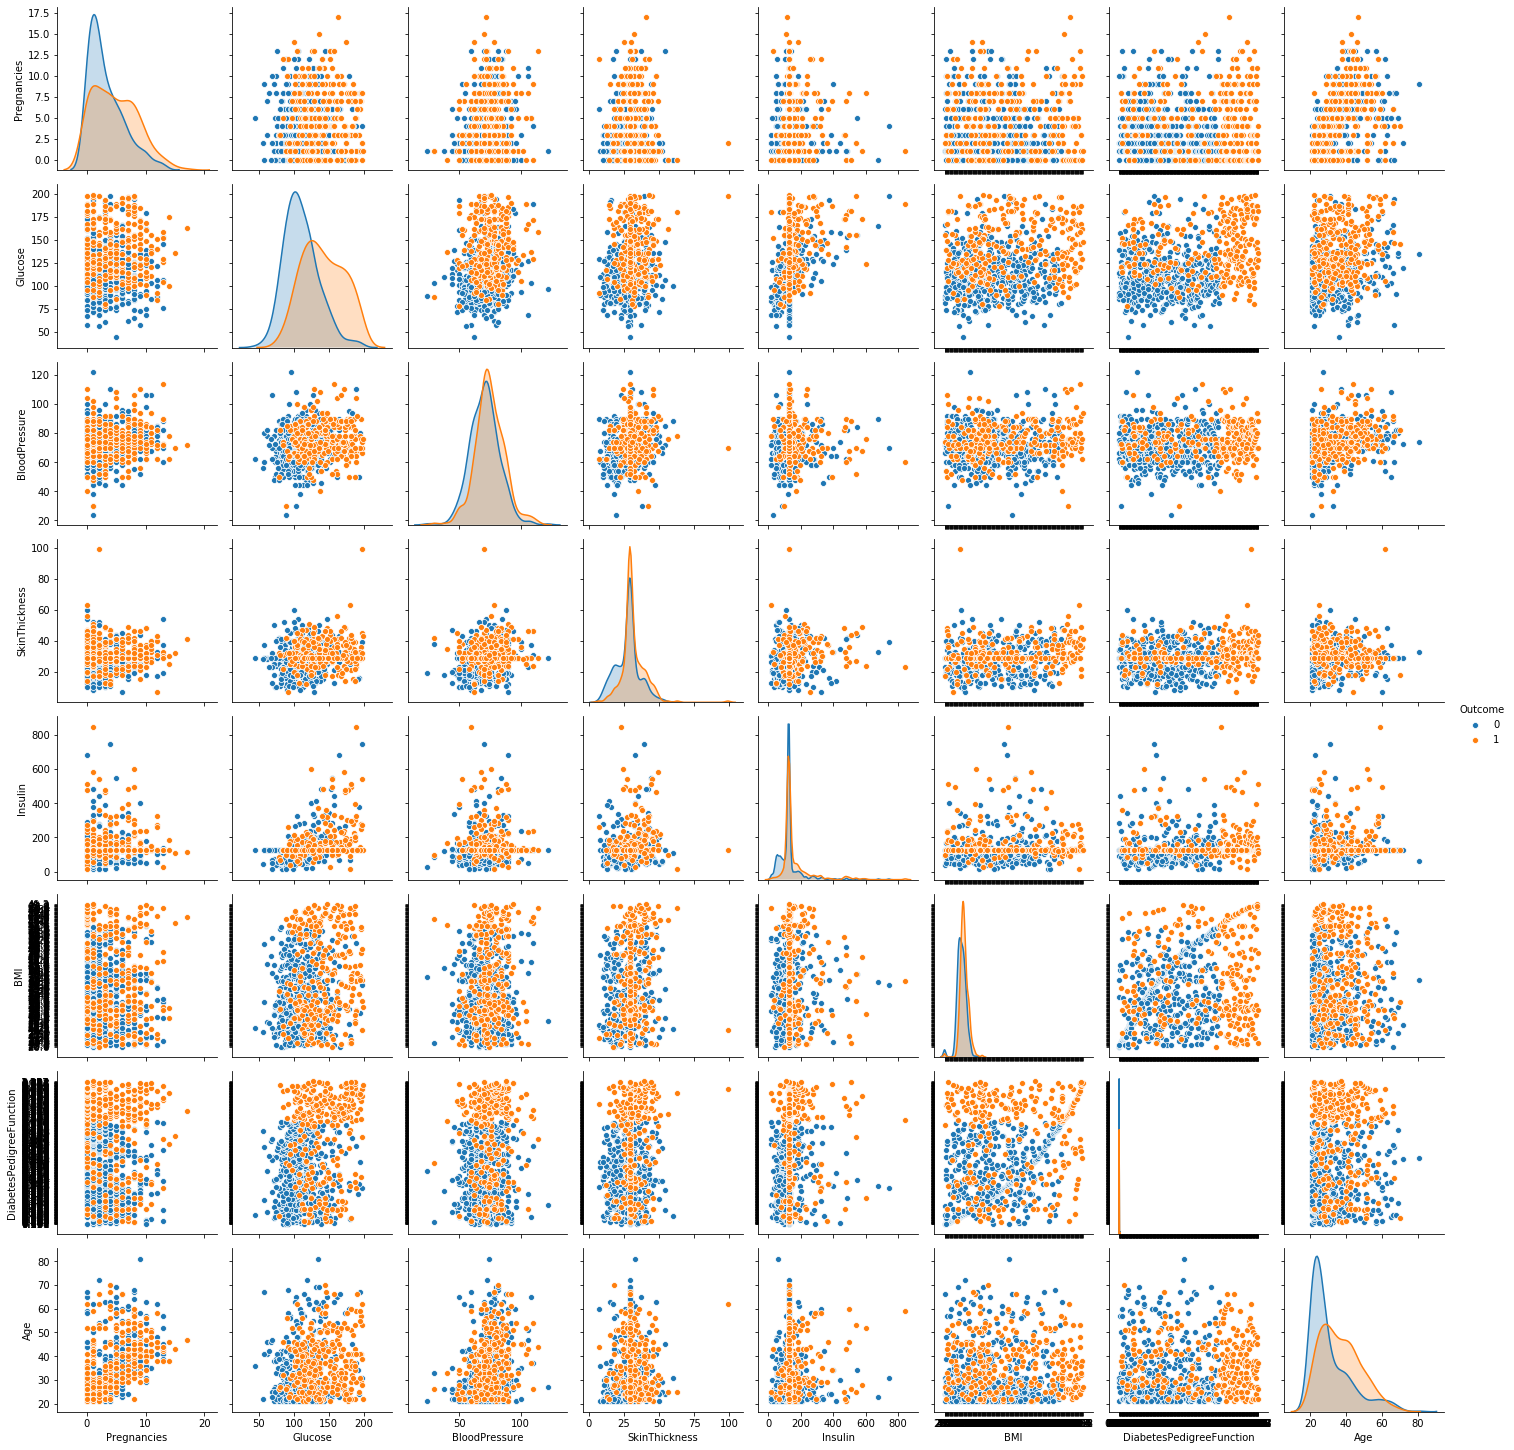

In [22]:
p=sns.pairplot(diabetes_df, hue = 'Outcome')

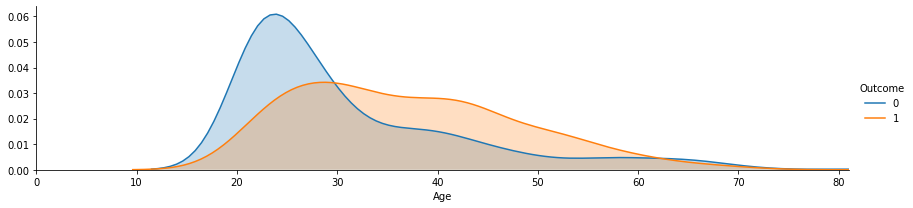

In [23]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(diabetes_df, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = diabetes_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

### Pearson's Correlation Coefficient:
helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.
### Heat Map
A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

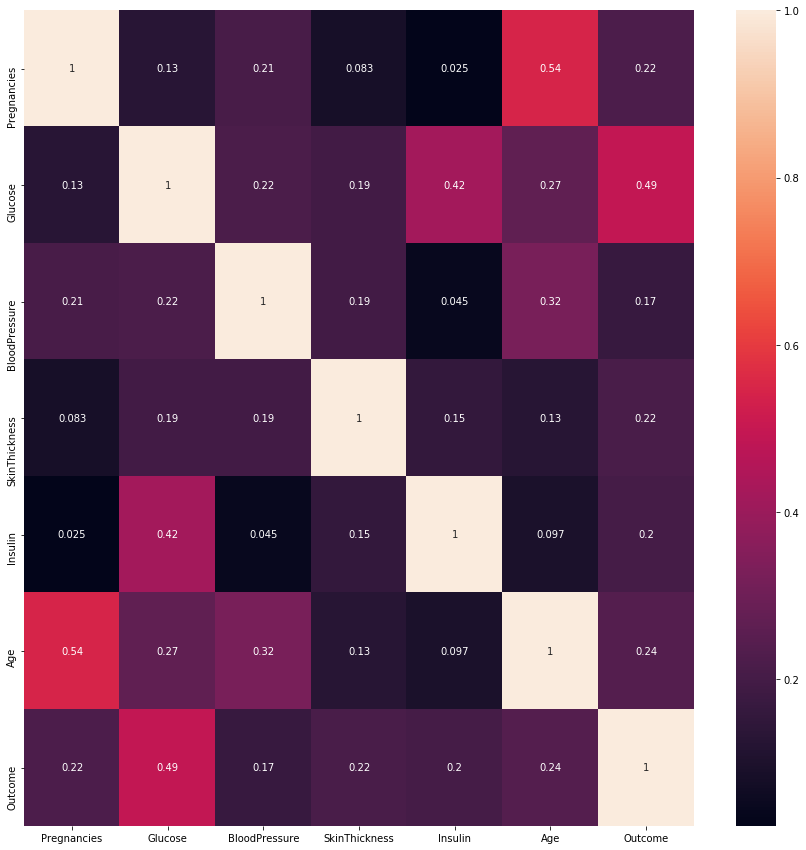

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes_df.corr(),annot=True)


We find 3 pairs which were having good correlations.

In [25]:
def plot_feat1_feat2(feat1, feat2) :  
    D = diabetes_df[(diabetes_df['Outcome'] != 0)]
    H = diabetes_df[(diabetes_df['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        opacity=0.8,
        marker = dict(color = 'lightskyblue',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        opacity=0.8,
        mode = 'markers',
        marker = dict(color = 'indigo',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [26]:
plot_feat1_feat2('Pregnancies', 'Age')

From the above plot ,we can see that people with Age < 35 and Pragnancies < 6 are less likly to be affected with diageties.

In [27]:
plot_feat1_feat2('Glucose', 'Insulin')

Here we can see that people with Glucose> 100 and Insulin > 180 are more likly to be affected with diageties.

In [28]:
plot_feat1_feat2('SkinThickness', 'BMI')

Here we can see that people with SkinThickness< 30 and BMI <45 are less likly to be affected with diageties

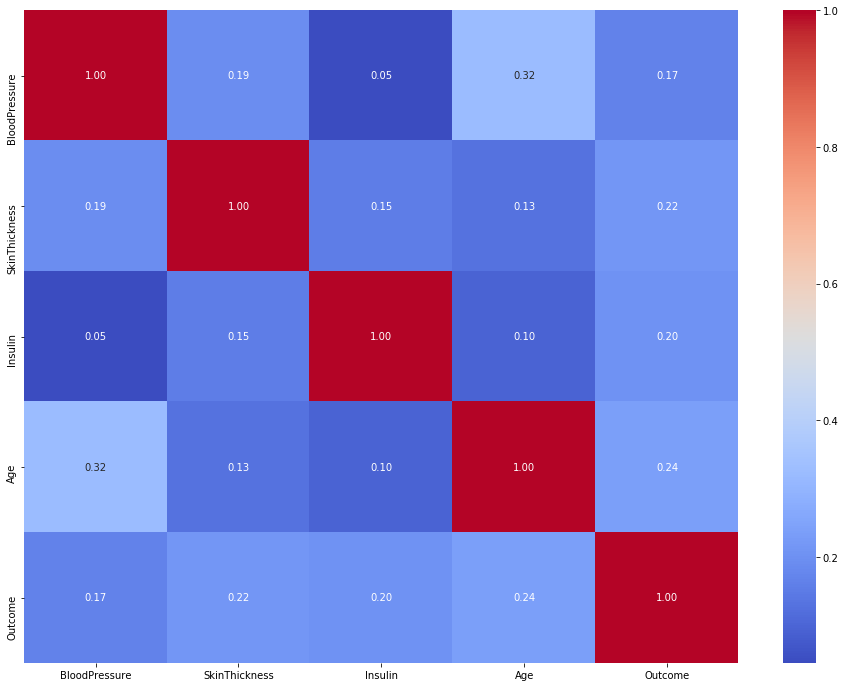

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(data=diabetes_df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### Feature Scaling and why is it important?

It is a part of data pre-processing which is applied to independent variables or features of the data. 

It is important to normalize the data within a particular range and sometimes it helps in speeding up the calculations in an algorithm. 

Below line of code shows scaling of features in the dataset. 

Scaling the data
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
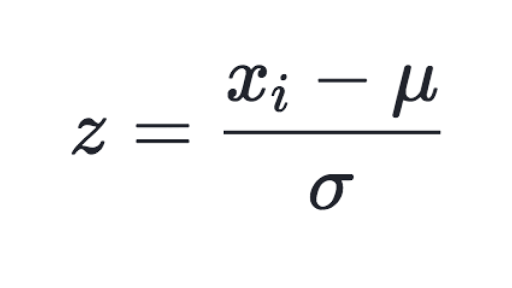



To learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

We are doing this step as to to load the data in the model and avoid multi-variable multi-output data problem.

In [30]:
# scale all the columns except the 'outcome'
scaled_data = minmax_scaling(diabetes_df,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [31]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.500745,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.396423,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.133413,0.347243,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.418778,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.642325,0.943638,0.200000


In [32]:
# defining variables X and Y. Y variable has the target value and X variable has other features in the dataset. 
x = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

Let us now split the data into three parts - train, valid and test datasets - at a ratio of 60%, 20% and 20% respectively. We could use split_frame() function for the same.

In [38]:
#train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
#response = "Outcome"
#train[response] = train[response].asfactor()
#valid[response] = valid[response].asfactor()
#test[response] = test[response].asfactor()
#print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

NameError: name 'dataX' is not defined

In [ ]:
# defining all functions used in the project

#this function is used to plot auc-roc curve
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

#function used to fit the training data into the model  
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
#function used to predict the outcome and return f1 score   
def pred_clf(clf, features, target):
    
   y_pred = clf.predict(features)
   return f1_score(target.values, y_pred, pos_label = 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))
    


### What is H2O?:

H2O is a Java-based software for data modeling and general computing. There are many different perceptions of the H2O software, but the primary purpose of H2O is as a distributed (many machines), parallel (many CPUs), in memory (several hundred GBs Xmx) processing engine.

Wait, we as Data Scientists do not need to know Java for using H2O to build models. We can use our favorite language (Python or R) :)

### H2O - Key Features:

Some of the key features

Access from both R and Python
Access from web-based interface named Flow. By means of Flow, data scientists are able to import, explore, and modify datasets, play with models, verify models performances, and much more. (This is not accessible here in Kaggle Kernels)
AutoML : automatic training and tuning of many models within a user-specified time-limit.
Distributed, In-memory processing : In-memory processing with fast serialization between nodes and clusters to support massive datasets.
Simple Deployment : Easy to deploy POJOs and MOJOs to deploy models for fast and accurate scoring in any environment, including with very large models.

In [ ]:
## importing the necesssary modules for H20
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

Once the module in imported, the first step is to initialize the h2o module.

The h2o.init() command is pretty smart and does a lot of things. First, an attempt is made to search for an existing H2O instance being started already, before starting a new one. When none is found automatically or specified manually with argument available, a new instance of H2O is started.

During startup, H2O is going to print some useful information. Version of the Python it is running on, H2O’s version, how to connect to H2O’s Flow interface or where error logs reside, just to name a few.



In [ ]:
h2o.init()

### Applying Machine Learning Techniques

We will use Random Forests, K-Nearest Neighbors, Decision Trees to predict the outcome. We will also check for accuracy, AUC-ROC score values. 

### Why Scaling the data for KNN?


It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

Test Train Split and Cross Validation methods
Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

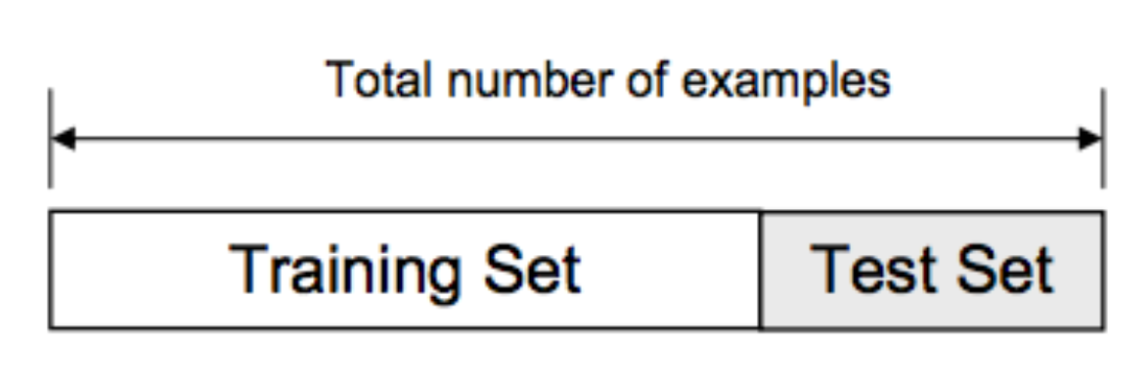

### Cross Validation: 
When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques



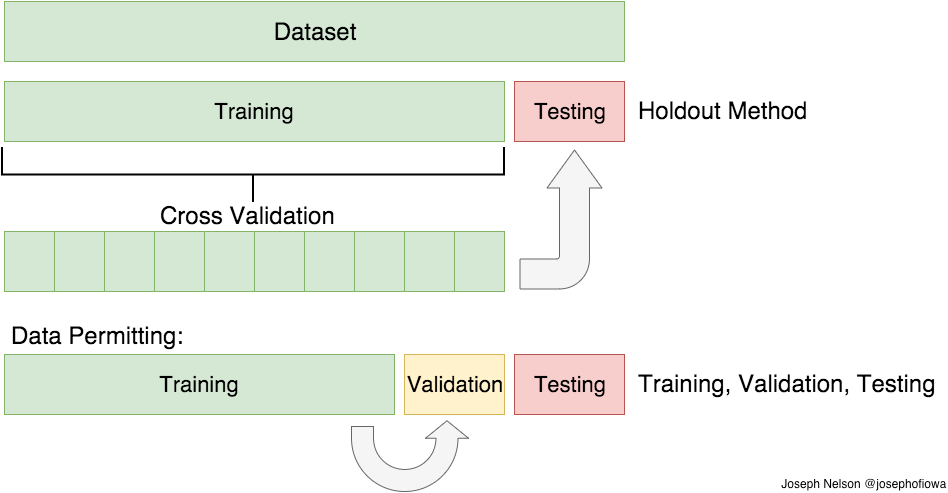

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [ ]:
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']


In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

### Result Visualization

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 10 hence 10 is used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(10)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

### Model Performance Analysis

1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> > 
> > Precision = TP/TP+FP
> > 
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> > 
> > Recall = TP/TP+FN
> > 
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
> > 
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

### 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=10) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

In [ ]:
diabetes_df_name=diabetes_df.columns

In [ ]:
x =  diabetes_df[diabetes_df_name[0:8]]
y = diabetes_df[diabetes_df_name[8]]
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=None,shuffle=True,stratify=diabetes_df['Outcome'])


### spot check alogrithms

Spot-checking algorithms is a technique in applied machine learning designed to quickly and objectively provide a first set of results on a new predictive modeling problem.

Unlike grid searching and other types of algorithm tuning that seek the optimal algorithm or optimal configuration for an algorithm, spot-checking is intended to evaluate a diverse set of algorithms rapidly and provide a rough first-cut result. This first cut result may be used to get an idea if a problem or problem representation is indeed predictable, and if so, the types of algorithms that may be worth investigating further for the problem.

Spot-checking is an approach to help overcome the “hard problem” of applied machine learning and encourage you to clearly think about the higher-order search problem being performed in any machine learning project.

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [ ]:
def BasedLine2(x_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'


    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=None)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [ ]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [ ]:

models = GetBasedModel()
names,results = BasedLine2(x_train, y_train,models)
PlotBoxR().PlotResult(names,results)

In [ ]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [ ]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

## Feature Engineering
#### 4.1. Data Preprocessig
Numerical features preprocessing is different for tree and non tree model.

1) Usually:

Tree based models does not depend on scaling
Non-tree based models hugely depend on scaling

2) Most Often used preprocening are:

a)MinMax scaler to [0,1]

b)Standard Scaler to mean = 0 and std =1

c)Rank (We do not work on it in this data set)

d)Using np.log(1+data), np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

I have defined  a function named getscaledmodel() that takes a defined model and returns a pipeline which will first standardize the input data, then normalize it prior to fitting the model.

### Standard

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(x_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

### MinMax

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(x_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

As we can see, the standarscaler and min and max effect on non tree models and the prediction results improve

## Remove Outliers

let's remove outliers and see how it effects on the prediction

In [ ]:
df_t = diabetes_df.copy()
df_t_name = df_t.columns

### Outliers

An outlier is an observation point that is distant from other observations.

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = float(np.percentile(valueOfFeature, 25.))

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = float(np.percentile(valueOfFeature, 75.))

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = float((Q3-Q1)*1.5)
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return float(df_out)


#### Feature 0

In [ ]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

#### Feature 0

In [ ]:
feature_number = 0
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,diabetes_df_name[feature_number],True)
OutLiersBox(df_clean,diabetes_df_name[feature_number])

#### Feature 1

In [ ]:
feature_number = 1
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,diabetes_df_name[feature_number],True)
OutLiersBox(df_clean,diabetes_df_name[feature_number])

### Feature 2

In [ ]:
feature_number = 2
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,diabetes_df_name[feature_number],True)
OutLiersBox(df_clean,diabetes_df_name[feature_number])

#### Feature 3

In [ ]:
feature_number = 3
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

#### Feature 4

In [ ]:
feature_number = 4
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

#### Feature 5

In [ ]:
feature_number = 5
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

#### Feature 6

In [ ]:
feature_number = 6
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

#### Feature 7

In [ ]:
feature_number = 7
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])


#### Feature 8

In [ ]:
feature_number = 8
OutLiersBox(diabetes_df,diabetes_df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,diabetes_df_name[feature_number],True)
OutLiersBox(df_clean,diabetes_df_name[feature_number])

In [ ]:
df = diabetes_df

### Comparing the accuracy of models after cleaning

In [ ]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

It can be seen that the prediction is improving

### Feature Selection
Feature selection is also called variable selection or attribute selection. It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

##### Corrolation
If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature

In [ ]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is not highly corrolated feature in this data set

## Feature selection

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features

In [ ]:
SEED = 7
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [ ]:
df_feature_imp_name = df_feature_imp.columns

In [ ]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

We still could improve the prediction

## Algorithm Tuning

In [ ]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns


In [ ]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [ ]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    

### Logistic Regression

C : Regularization value, the more, the stronger the regularization(double).

RegularizationType: Can be either "L2" or “L1”. Default is “L2”

In [ ]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

In [ ]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [ ]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

## KNN

n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [ ]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

## SVC

C: The Penalty parameter C of the error term.

Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [ ]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [ ]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

### Decision Tree

max_depth: Maximum depth of the tree (double).

row_subsample: Proportion of observations to consider (double).

max_features: Proportion of columns (features) to consider in each level (double).

In [ ]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [ ]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [ ]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

### AdaBoostClassifier

learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.

n_estimators: Number of trees to build.

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

### GradientBoosting

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

### Ensemble Method(Voting Ensemble)

###  Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)



In [ ]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),]
    

In [ ]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

### Beyond Voting

In [ ]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6
              }

    return models

#### Error Corrolation

In [ ]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [ ]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

In [ ]:
pip install mlens

In [ ]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

In [ ]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

we can further implement stacking to get better accuracy 

## Conclusion:
I have performed KNN ,spot check alogirthms and Ensemble modeling to check which is giving the best accuracy .Out of all the algorithms Decission Tree has given the best accuracy compared to other models.I have also dealt with the outliers while dealing the spot check alogrithm




### Contribution:

60% of the code has been developed by me and the rest of the code has been referred from other sources like research paper, blogs and github. 

### Citation: 
https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.jeremyjordan.me/nn-learning-rate/

https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.kaggle.com/adhishthite/pima-dataset-prediction-model-with-keras-80

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## License

Copyright 2020 POOJITHA MUPPALLA 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.